# <u>***TermiDator***</u>
#### *a killer solution*

## Amazon Reviews and Amazon Products
Some questions that can be asked about reviews and a product:
- How do people normally feel about this product?
- How is this person as a reviewer?

What is normally implemented?
- rating system (stars)
- some sort of badge system, or a pros and cons section
- the text in the reviews themselves show the true experience for the user

## Anazlyzing reviews emotionally
What if you had a simple endpoint that returns the emotional spectrum of a product with some insightful statistics?

Use cases:
- What does one do when undecided between products? reading reviews. Usually a couple high rated, a couple low, some in between.
- What if you are a company looking to break into the market? you want insights. What do people really care about? What are some pitfalls in this particular category?
- What if you are the marketplace itself and want to implement a more sophisticated ranking system?

***TermiDator*** to the rescue

What does ***TermiDator*** propose?

- rating system
    - stars
    - emotion spectrum (anger, disgust, fear, joy, neutral, sadness, surprise) based on the reviewText and summary fields

### Emotion Classification using pretrained BERT Transformers
https://huggingface.co/j-hartmann/emotion-english-distilroberta-base

### Example use
Out of 11.9 million Amazon Products and around 120 million reviews, it was decided to choose one main category and process reviews for that one only.

The main category is 'Toys & Games'

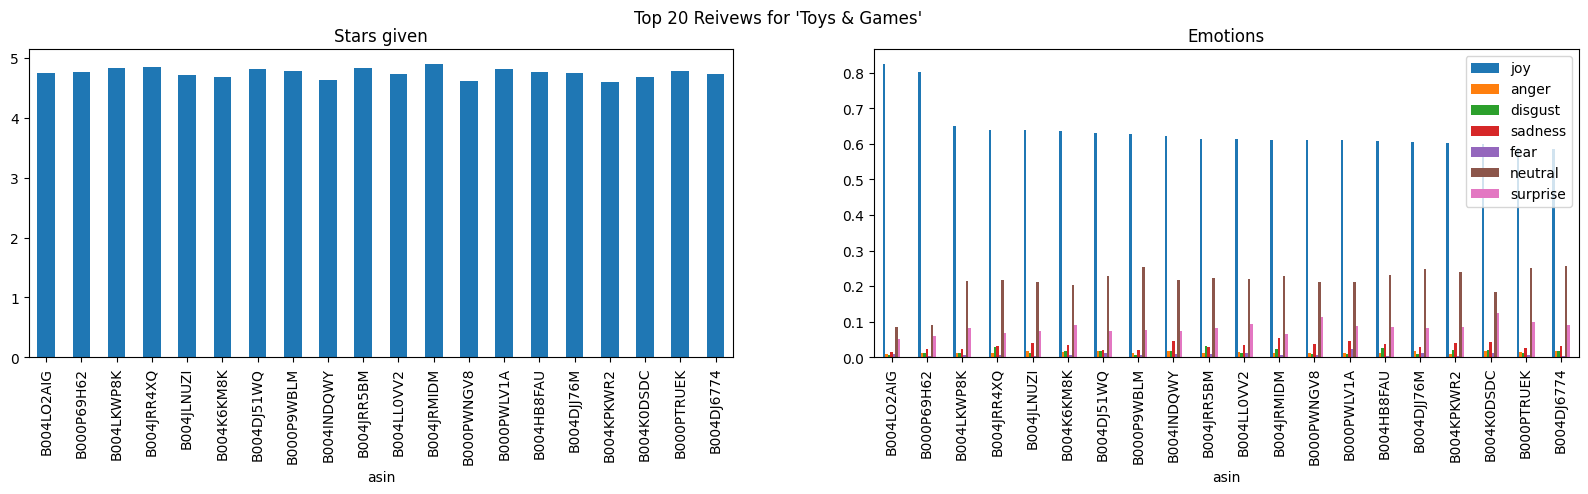

In [2]:
from utils import BASE_URL, requests, pd, plt, get_most_relevant_products, get_most_avg_review

df = pd.DataFrame(get_most_relevant_products("Toys & Games"))
df.set_index("asin", inplace=True)
fig, axs = plt.subplots(1, 2, figsize=(20,4))
fig.suptitle("Top 20 Reivews for 'Toys & Games'")
axs[0].set_title('Stars given'); axs[1].set_title('Emotions')
df["overall"].plot(kind='bar', ax=axs[0])
df[["joy", "anger", "disgust", "sadness", "fear", "neutral", "surprise"]].plot(kind='bar', ax=axs[1]);

In [2]:
print(f"B004LO2AIG: {get_most_avg_review('B004LO2AIG')['reviewText']}")
print(f"B000P69H62: {get_most_avg_review('B000P69H62')['reviewText']}")
print(f"B004LKWP8K: {get_most_avg_review('B004LKWP8K')['reviewText']}")
print(f"B004JRR4XQ: {get_most_avg_review('B004JRR4XQ')['reviewText']}")
print(f"B004JLNUZI: {get_most_avg_review('B004JLNUZI')['reviewText']}")

B004LO2AIG: We generally are not a board game house, but we have already played this game twice in three days.  Our kids love it.  Certain to be a hit at our next party.
B000P69H62: Purchased this game hoping it would be different and fun.  We laughed so hard, we were all a bit noisy but that's what this is all about.  For a group from teens thru 70's it was just about fun. Pleased with this game and would surely recommend it to others.
B004LKWP8K: My 2 year old LOVED this one. Unfortunately it took him only a week to go through all of it, but I must say he spent quite some time doing it every day.
B004JRR4XQ: MY Best friend
B004JLNUZI: Purchased to go along with M & D Snacks and Sweets Food Cart.  Probably didn't need them since the cart was full of sweets/snacks, but the girls liked scooping the ice cream onto cones..


### Endpoints

![Endpoints](./endpoints.png)

# How was this done?
https://github.com/martinvuyk/factored-datathon-2023-termidator/tree/develop

In [3]:
from IPython.display import display, Markdown
readme_page = "https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/README.md"
image_dir = "https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images"
display(Markdown(requests.get(readme_page).content.decode().replace("./images", image_dir)))

# <u>***TermiDator***</u>
#### *a killer solution*

### Style Guide
- Black formatter

## Architecture
- backend
  - REST server that handles data streaming and triggers batch processing jobs
- Jupyter Notebooks
  - data visualization and analysis tool
- db
  - Postgres database (datalake)

![Architecture](https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images/architecture.png)
---
|Technology|Pros|Cons|
|----------|----|----|
|Postgres|on-prem: platform independent|it's an OLTP databse, not OLAP because it's a row DB|
|Python|Easy to code and understand|slow, interpreted, huge Heap allocation|
|Django|Easy DB Model building and migration|It's ORM is not designed for DataStreaming nor DWH building, performance is lacking|
|Jupyter Notebooks|Ease of use, Open Source, easy to integrate|Not the most professional data visualization|
|PostGIS|Easy plug and play extension for Postgres|Supports up to 4D vectors|


PS: if we trully wanted to scale we'd directly upload to a cloud provider and do stream and batch processing with Spark (orchestrated with Ariflow most probably) on top of a columnar DB

![DB_SCHEMA](https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images/db_schema.png)

## Alternatives we looked at
- https://github.com/pgvector/pgvector
- https://theorangeone.net/posts/django-orm-performance/
- https://docs.djangoproject.com/en/dev/topics/db/sql/#executing-custom-sql-directly
- https://pypi.org/project/beam-postgres/
- https://www.psycopg.org/docs/


# Performance:
- Machine specs: 
  - Intel® Core™ i7-7700HQ CPU @2.80GHz,  8 threads
  - 32GB RAM @2667 MT/s, 1.2V
- Resources for docker QEMU VM
  - 6 threads
  - 16GB RAM
  - 1,5GB Swap
  - 200GB Disk
- Idle resource utilization (100% CPU means 1 thread)
![](https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images/idle_backend.png)

---
During streaming of amazon_metadata
- Time (seconds)
  - /server/backend 
  ![](https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images/metadata_etl.png)
  - /server/backend/data/streamer.py
  ![](https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images/metadata_etl_client.png)
- Resources
  - /server/backend 
  ![](https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images/metadata_docker.png)
  - /server/backend/data/streamer.py
  ![](https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images/metadata_processes.png)
  - Overall:
  ![](https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images/metadata_cpu.png)

(most of the payload goes straight to the garbage)

---
During streaming of amazon_reviews
- Time (seconds) for 55826 entries 
  - /server/backend 
  ![](https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images/review_backend.png)
  - /server/backend/data/streamer.py
  ![](https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images/review_client.png)
- Resources
  - /server/backend
  ![](https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images/review_backend_resource.png)
  - /server/backend/data/streamer.py
  ![](https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images/review_client_resource.png)
  - Overall
  ![](https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images/review_overall_resource.png)

---
During streaming of emotion analysis of reviews
- Time: 
  - ~ 10 ms per entry or even less, couldn't measure properly because of asyncio
- Resources
  - /server/backend 
  ![](https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images/emotions_streaming_server.png)
  - /server/notebooks/nlp/emotions_classifier.py
  ![](https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images/emotions_streaming_client.png)
  - Overall:
  ![](https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images/emotions_streaming_overall.png)


---
During updating of PCA embeddings for review emotions
- Time: ~ 12 ms per asin. ~ 3 minutes total for ~ 150k emotionally pre-processed reviews. Didn't even bother to use asyncio

---
Fetching closest (knn) review to the average for that asin
- Time for an asin with 2562 reviews processed
  - /server/backend 
  ![](https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images/pca_backend.png)
  - /server/notebooks/utils.py
  ![](https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images/pca_client.png)

---
DB contents:
![](https://raw.githubusercontent.com/martinvuyk/factored-datathon-2023-termidator/develop/images/db_contents.png)